<a href="https://colab.research.google.com/github/Spandana2704/ML/blob/main/ML(W4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import pandas as pd
import numpy as np

In [71]:
df=pd.read_csv('/content/titanic_train.csv')
df.shape

(891, 12)

In [72]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [73]:
df=df.drop(['PassengerId','Name','Ticket'],axis=1)

In [74]:
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [75]:
[col for col in df.columns if df[col].isnull().sum()>0]

['Age', 'Cabin', 'Embarked']

In [76]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [77]:
df=df.drop(['Embarked','Cabin'],axis=1)

In [78]:
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor

In [79]:
from sklearn.metrics import roc_auc_score

In [80]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [81]:
X = df.drop('Survived',axis=1)
y = df['Survived']

In [82]:
X = pd.get_dummies(X,drop_first=True)

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [85]:
grouped_feature_ls = []
correlated_groups = []
def correlation (dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
corr_features=correlation (x_test, 0.9)
correlated_features = set(corr_features)
print(len(correlated_features))

0


In [86]:
sfs1=SFS(RandomForestClassifier(n_jobs=4),k_features=5,forward=True,verbose=2,scoring='roc_auc' or 'accuracy',cv=3)

In [87]:
sfs1=sfs1.fit(np.array(x_train.fillna(0)),y_train)

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.4s finished

[2025-08-27 08:53:52] Features: 1/5 -- score: 0.765194136612553[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.8s finished

[2025-08-27 08:53:56] Features: 2/5 -- score: 0.832223720877483[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.5s finished

[2025-08-27 08:54:00] Features: 3/5 -- score: 0.8379761268267392[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.3s finished

[2025-08-27 08:54:02] Features: 4/5 -- score: 0.8442295696834191[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s finished

[2025-08-27 08:54:03] Features: 5/5 -- score: 0.8462547794951557

In [88]:
print('best accracy score',sfs1.k_score_)
print('best subset(indices)',sfs1.k_feature_idx_)
print('Best subset (corresponding names):', sfs1.k_feature_names_)

best accracy score 0.8462547794951557
best subset(indices) (0, 1, 2, 4, 5)
Best subset (corresponding names): ('0', '1', '2', '4', '5')


In [89]:
sfs2=SFS(RandomForestClassifier(n_jobs=4),k_features=5,forward=False,verbose=2,scoring='roc_auc' or 'accuracy',cv=3)
sfs2=sfs2.fit(np.array(x_train.fillna(0)),y_train)
print('best accracy score',sfs2.k_score_)
print('best subset(indices)',sfs2.k_feature_idx_)
print('Best subset (corresponding names):', sfs2.k_feature_names_)

best accracy score 0.8464050500631864
best subset(indices) (0, 1, 2, 4, 5)
Best subset (corresponding names): ('0', '1', '2', '4', '5')


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.3s finished

[2025-08-27 08:54:15] Features: 5/5 -- score: 0.8464050500631864

In [90]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
efs=EFS(RandomForestClassifier(n_jobs=4),min_features=1,max_features=4,scoring='accuracy',cv=5)
efs=efs.fit(x_train,y_train)

Features: 56/56

In [ ]:
print('best accuracy score',efs.best_score_)
print('best subset(indices)',efs.best_idx_)
print('Best subset (corresponding names):', efs.best_feature_names_)

best accuracy score 0.8138580645161291
best subset(indices) (0, 1, 2, 5)
Best subset (corresponding names): ('Pclass', 'Age', 'SibSp', 'Sex_male')


In [ ]:
efs_results = pd.DataFrame.from_dict(efs.get_metric_dict()).T
efs_results.sort_values(by='avg_score', ascending=True, inplace=True)
efs_results

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
11,"(1, 2)","[0.632, 0.56, 0.608, 0.5645161290322581, 0.604...",0.593871,"(Age, SibSp)",0.035352,0.027505,0.013753
1,"(1,)","[0.616, 0.576, 0.616, 0.5725806451612904, 0.59...",0.595471,"(Age,)",0.02403,0.018696,0.009348
12,"(1, 3)","[0.56, 0.568, 0.624, 0.6209677419354839, 0.604...",0.595561,"(Age, Parch)",0.034318,0.0267,0.01335
34,"(1, 3, 4)","[0.592, 0.624, 0.568, 0.5887096774193549, 0.62...",0.600348,"(Age, Parch, Fare)",0.029499,0.022951,0.011475
3,"(3,)","[0.568, 0.6, 0.616, 0.6048387096774194, 0.6451...",0.6068,"(Parch,)",0.032064,0.024947,0.012473
13,"(1, 4)","[0.608, 0.656, 0.624, 0.5645161290322581, 0.63...",0.617923,"(Age, Fare)",0.039845,0.031001,0.0155
31,"(1, 2, 3)","[0.656, 0.576, 0.688, 0.6290322580645161, 0.60...",0.630774,"(Age, SibSp, Parch)",0.050067,0.038954,0.019477
2,"(2,)","[0.624, 0.624, 0.656, 0.5645161290322581, 0.71...",0.637252,"(SibSp,)",0.064192,0.049944,0.024972
21,"(0, 1, 2)","[0.608, 0.616, 0.712, 0.6129032258064516, 0.65...",0.640426,"(Pclass, Age, SibSp)",0.050413,0.039223,0.019612
42,"(0, 1, 2, 4)","[0.672, 0.648, 0.632, 0.6048387096774194, 0.67...",0.646852,"(Pclass, Age, SibSp, Fare)",0.034266,0.02666,0.01333


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0, criterion='gini')
rfc.fit(x_train, y_train)
for feature in zip(x_train.columns, rfc.feature_importances_):
    print(feature)

('Pclass', np.float64(0.08580548090109545))
('Age', np.float64(0.26433757901109173))
('SibSp', np.float64(0.05355992352286061))
('Parch', np.float64(0.03699908167792097))
('Fare', np.float64(0.28790097031129963))
('Sex_male', np.float64(0.2713969645757317))


In [ ]:
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(estimator=rfc, threshold=0.2)
sfm = sfm.fit(x_train, y_train)
feature_names=x_train.columns
print('The most important features based on random forest classifier:')
for feature_list_index in sfm.get_support(indices=True):
    print('- ' + feature_names[feature_list_index])

The most important features based on random forest classifier:
- Age
- Fare
- Sex_male


In [ ]:
from sklearn.metrics import accuracy_score
rfc_full = RandomForestClassifier(random_state=0, criterion='gini')
rfc_full.fit(x_train, y_train)
pred_full = rfc_full.predict(x_test)
print('The accuracy of classifier with full features: {:.2f}'.format(accuracy_score(y_test, pred_full)))

The accuracy of classifier with full features: 0.82


In [ ]:
x_important_train = sfm.transform(x_train)
x_important_test = sfm.transform(x_test)

In [ ]:
print(x_important_train.shape)
print(x_important_test.shape)

(623, 3)
(268, 3)


In [ ]:
rfc_lim = RandomForestClassifier(random_state=0, criterion='gini')
rfc_lim.fit(x_important_train, y_train)
pred_lim = rfc_lim.predict(x_important_test)
print('The accuracy of classifier with limited features: {:.2f}'.format(accuracy_score(y_test, pred_lim)))

The accuracy of classifier with limited features: 0.80


In [ ]:
df2=pd.read_csv('/content/house_price_train.csv')
df2.shape

(1460, 81)

In [ ]:
df2.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
cols_to_drop = [
    'Id','Alley','MiscFeature','PoolQC','Fence','FireplaceQu',
    'Utilities','MiscVal','Condition2','GarageYrBlt',
    'TotalBsmtSF','GarageArea','MoSold'
]

In [ ]:
df2=df2.drop(cols_to_drop,axis=1)

In [ ]:
[col for col in df2.columns if df2[col].isnull().sum()>0]

['LotFrontage',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [ ]:
df2['LotFrontage'] = df2['LotFrontage'].fillna(df2['LotFrontage'].median())
df2['MasVnrArea'] = df2['MasVnrArea'].fillna(df2['MasVnrArea'].median())

In [ ]:
categorical_cols = ['MasVnrType','BsmtQual','BsmtCond','BsmtExposure',
                    'BsmtFinType1','BsmtFinType2','Electrical',
                    'GarageType','GarageFinish','GarageQual','GarageCond']

for col in categorical_cols:
    df2[col] = df2[col].fillna(df2[col].mode()[0])

In [ ]:
X2 = df2.drop('SalePrice',axis=1)
y2 = df2['SalePrice']

In [ ]:
X2 = pd.get_dummies(X2,drop_first=True)

In [ ]:
X2.shape

(1460, 218)

In [ ]:
x_train2,x_test2,y_train2,y_test2=train_test_split(X2,y2,test_size=0.3,random_state=0)

In [ ]:
grouped_feature_ls = []
correlated_groups = []
def correlation (dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
corr_features=correlation (x_test2, 0.9)
correlated_features = set(corr_features)
print(len(correlated_features))

0


In [ ]:
x_train2.drop(labels=correlated_features, axis=1, inplace=True)
x_test2.drop(labels=correlated_features, axis=1, inplace=True)

In [ ]:
x_train2.shape

(1022, 188)

In [ ]:
constant_features=[features for features in x_train2.columns if x_train2[features].std()==0]
len(constant_features)

0

In [ ]:
x_train2.drop(labels=constant_features,axis=1,inplace=True)
x_test2.drop(labels=constant_features,axis=1,inplace=True)

In [ ]:
quasi_constant_feat=[]

for feature in x_train2.columns:
  predominant=(x_train2[feature].value_counts()/float(len(x_train2))).sort_values(ascending=False).values[0]
  if predominant>0.999:
    quasi_constant_feat.append(feature)

len(quasi_constant_feat)

0

In [ ]:
x_train2.drop(labels=quasi_constant_feat,axis=1,inplace=True)
x_test2.drop(labels=quasi_constant_feat,axis=1,inplace=True)

In [ ]:
dup=[]
for i in range (0,len(x_train2.columns)):
    col1=x_train2.columns[i]
    for col2 in x_train2.columns[i+1:]:
        if x_train2[col1].equals(x_train2[col2]):
            dup.append(col2)
dup_features=set(dup)
print(len(dup_features))

0


In [ ]:
x_train2.shape

(1022, 188)

In [ ]:
import pandas as pd
from sklearn.feature_selection import mutual_info_regression, SelectKBest
mi = mutual_info_regression(x_train2.fillna(0), y_train2)
mi = pd.Series(mi, index=x_train2.columns)
selector = SelectKBest(score_func=mutual_info_regression, k=10)
selector.fit(x_train2.fillna(0), y_train2)
selected_features = x_train2.columns[selector.get_support()]
print("Top 10 Selected Features:\n", selected_features.tolist())
x_train2_selected = selector.transform(x_train2.fillna(0))
x_train2_selected = pd.DataFrame(x_train2_selected, columns=selected_features)

Top 10 Selected Features:
 ['MSSubClass', 'OverallQual', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'GarageCars', 'ExterQual_TA']


In [ ]:
sfs3=SFS(RandomForestRegressor(n_jobs=4),k_features=5,forward=True,verbose=2,scoring='r2',cv=3)

NameError: name 'SFS' is not defined

In [ ]:
sfs3=sfs3.fit(np.array(x_train2_selected.fillna(0)),y_train2)

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    7.6s finished

[2025-08-20 05:00:17] Features: 1/5 -- score: 0.6682887904520398[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    6.5s finished

[2025-08-20 05:00:23] Features: 2/5 -- score: 0.7223347912943826[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    6.1s finished

[2025-08-20 05:00:30] Features: 3/5 -- score: 0.7301847821752899[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    7.4s finished

[2025-08-20 05:00:37] Features: 4/5 -- score: 0.7451150526720101[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    6.0s finished

[2025-08-20 05:00:43] Features: 5/5 -- score: 0.7940150183132539

In [ ]:
print('best accracy score',sfs3.k_score_)
print('best subset(indices)',sfs3.k_feature_idx_)
print('Best subset (corresponding names):', sfs3.k_feature_names_)

best accracy score 0.7940150183132539
best subset(indices) (1, 4, 5, 7, 8)
Best subset (corresponding names): ('1', '4', '5', '7', '8')


In [ ]:
sfs4=SFS(RandomForestRegressor(n_jobs=4),k_features=5,forward=False,verbose=2,scoring='r2',cv=3)

In [ ]:
sfs4=sfs4.fit(np.array(x_train2_selected.fillna(0)),y_train2)

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   15.9s finished

[2025-08-20 05:01:45] Features: 9/5 -- score: 0.8306163479524521[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   11.5s finished

[2025-08-20 05:01:56] Features: 8/5 -- score: 0.8283886486219476[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   10.1s finished

[2025-08-20 05:02:06] Features: 7/5 -- score: 0.8301428202570041[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    7.0s finished

[2025-08-20 05:02:13] Features: 6/5 -- score: 0.8229553605508023[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    6.8s finished

[2025-08-20 05:02:20] Features: 5/5 -- score: 0.8157996667400758

In [ ]:
print('best accracy score',sfs4.k_score_)
print('best subset(indices)',sfs4.k_feature_idx_)
print('Best subset (corresponding names):', sfs4.k_feature_names_)

best accracy score 0.8157996667400758
best subset(indices) (1, 2, 5, 6, 8)
Best subset (corresponding names): ('1', '2', '5', '6', '8')


In [ ]:
efs2=EFS(RandomForestRegressor(n_jobs=4),min_features=1,max_features=4,scoring='r2',cv=5)
efs2=efs2.fit(x_train2_selected,y_train2)

Features: 385/385

In [ ]:
print('best accuracy score',efs2.best_score_)
print('best subset(indices)',efs2.best_idx_)
print('Best subset (corresponding names):', efs2.best_feature_names_)

best accuracy score 0.8088176047395057
best subset(indices) (1, 2, 5, 6)
Best subset (corresponding names): ('OverallQual', 'YearBuilt', '2ndFlrSF', 'GrLivArea')


In [ ]:
efs2_results = pd.DataFrame.from_dict(efs2.get_metric_dict()).T
efs2_results.sort_values(by='avg_score', ascending=True, inplace=True)
efs2_results

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
5,"(5,)","[0.29600026407056335, 0.06677933490922483, 0.1...",0.126808,"(2ndFlrSF,)",0.128092,0.09966,0.04983
4,"(4,)","[0.1573910116864039, 0.22835703959365916, 0.25...",0.143956,"(1stFlrSF,)",0.15714,0.12226,0.06113
3,"(3,)","[0.22564330883303962, 0.2890993855168862, 0.20...",0.222384,"(YearRemodAdd,)",0.062425,0.048569,0.024284
0,"(0,)","[0.28429390268317933, 0.280441079411451, 0.179...",0.226234,"(MSSubClass,)",0.079627,0.061953,0.030976
12,"(0, 3)","[0.20515886027566999, 0.3359081141431923, 0.27...",0.273327,"(MSSubClass, YearRemodAdd)",0.054214,0.04218,0.02109
...,...,...,...,...,...,...,...
214,"(0, 2, 5, 6)","[0.7309943908539124, 0.8311981034787824, 0.764...",0.792189,"(MSSubClass, YearBuilt, 2ndFlrSF, GrLivArea)",0.050044,0.038936,0.019468
285,"(1, 3, 5, 6)","[0.6749475150218707, 0.8581320994552373, 0.789...",0.793334,"(OverallQual, YearRemodAdd, 2ndFlrSF, GrLivArea)",0.082375,0.064091,0.032045
280,"(1, 3, 4, 5)","[0.7280736565019137, 0.8262807372546631, 0.818...",0.799679,"(OverallQual, YearRemodAdd, 1stFlrSF, 2ndFlrSF)",0.046928,0.036512,0.018256
265,"(1, 2, 4, 5)","[0.7225032263407922, 0.84653048077507, 0.80304...",0.80268,"(OverallQual, YearBuilt, 1stFlrSF, 2ndFlrSF)",0.054788,0.042627,0.021314


In [91]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=0, criterion='squared_error')
rfr.fit(x_train2, y_train2)
for feature in zip(x_train2.columns, rfr.feature_importances_):
    print(feature)

('MSSubClass', np.float64(0.0024913838290226333))
('LotFrontage', np.float64(0.007365613014300334))
('LotArea', np.float64(0.01926247910992808))
('OverallQual', np.float64(0.5564666671265123))
('OverallCond', np.float64(0.005949609400272334))
('YearBuilt', np.float64(0.01862643268035045))
('YearRemodAdd', np.float64(0.00762504329617526))
('MasVnrArea', np.float64(0.011604734257492935))
('BsmtFinSF1', np.float64(0.03350172388871787))
('BsmtFinSF2', np.float64(0.0010172277609978623))
('BsmtUnfSF', np.float64(0.00835232739566203))
('1stFlrSF', np.float64(0.04588972764075788))
('2ndFlrSF', np.float64(0.012871183625773249))
('LowQualFinSF', np.float64(7.968404720689777e-05))
('GrLivArea', np.float64(0.12928926807569088))
('BsmtFullBath', np.float64(0.000898337626592723))
('BsmtHalfBath', np.float64(0.0011916319005645262))
('FullBath', np.float64(0.003419485486882398))
('HalfBath', np.float64(0.0010722376183723277))
('BedroomAbvGr', np.float64(0.004365916106188301))
('KitchenAbvGr', np.float

In [92]:
from sklearn.feature_selection import SelectFromModel
sfm2 = SelectFromModel(estimator=rfr, threshold=0.2)
sfm2 = sfm2.fit(x_train2, y_train2)
feature_names2=x_train2.columns
print('The most important features based on random forest classifier:')
for feature_list_index in sfm2.get_support(indices=True):
    print('- ' + feature_names2[feature_list_index])

The most important features based on random forest classifier:
- OverallQual


In [93]:
from sklearn.metrics import mean_squared_error, r2_score
rfr_full = RandomForestRegressor(random_state=0, criterion='squared_error')
rfr_full.fit(x_train2, y_train2)
pred_full2 = rfr_full.predict(x_test2)
print("R² Score:", r2_score(y_test2, pred_full2))
print("MSE:", mean_squared_error(y_test2, pred_full2))

R² Score: 0.8625690243184906
MSE: 933017717.6249716


In [94]:
x_important_train2 = sfm2.transform(x_train2)
x_important_test2 = sfm2.transform(x_test2)

In [95]:
print(x_important_train2.shape)
print(x_important_test2.shape)

(1022, 1)
(438, 1)


In [96]:
rfr_lim = RandomForestRegressor(random_state=0, criterion='squared_error')
rfr_lim.fit(x_important_train2, y_train2)
pred_lim2 = rfr_lim.predict(x_important_test2)
print("R² Score (limited features):", r2_score(y_test2, pred_lim2))
print("MSE (limited features):", mean_squared_error(y_test2, pred_lim2))

R² Score (limited features): 0.6914271092644155
MSE (limited features): 2094898714.1171165


In [97]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [99]:
X_scaled.shape

(891, 6)

In [100]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [104]:
X_pca.shape

(891, 2)

In [101]:
X_train, X_test, Y_train, Y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)
model = LogisticRegression()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

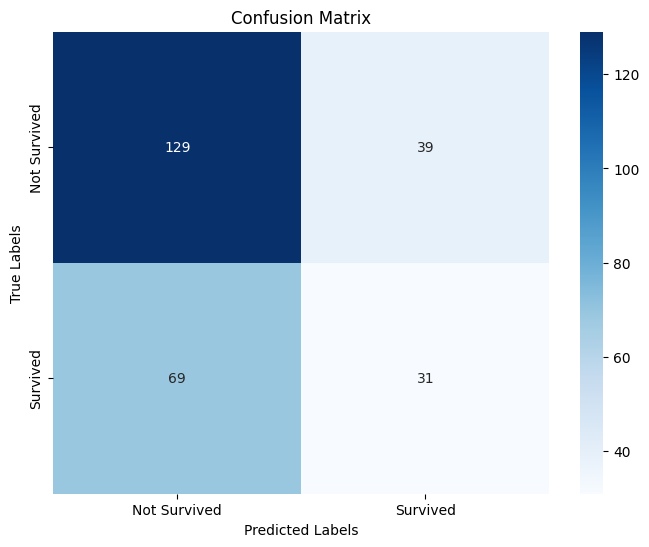

In [102]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

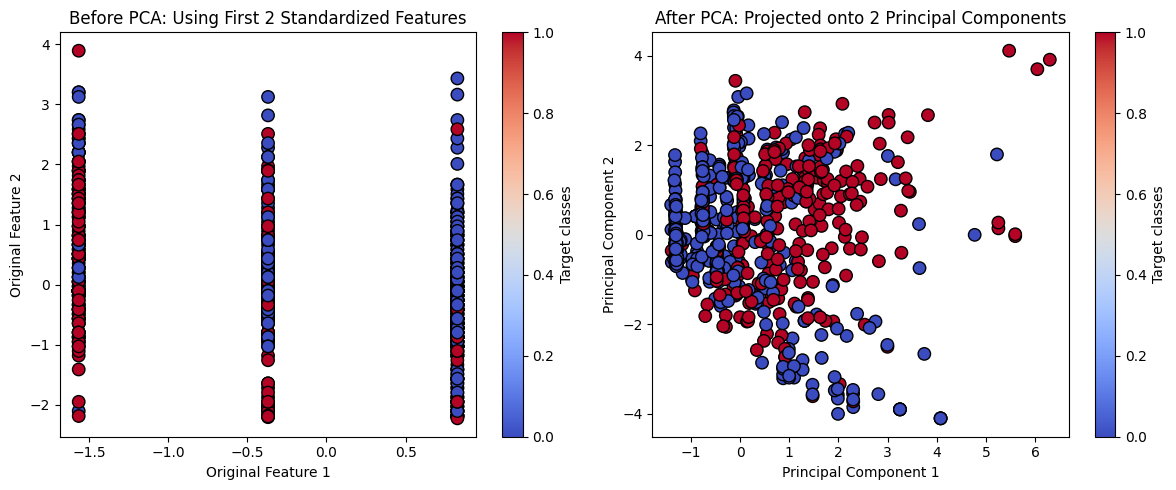

In [103]:
y_numeric = pd.factorize(y)[0]
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_numeric, cmap='coolwarm', edgecolor='k', s=80)
plt.xlabel('Original Feature 1')
plt.ylabel('Original Feature 2')
plt.title('Before PCA: Using First 2 Standardized Features')
plt.colorbar(label='Target classes')

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_numeric, cmap='coolwarm', edgecolor='k', s=80)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('After PCA: Projected onto 2 Principal Components')
plt.colorbar(label='Target classes')

plt.tight_layout()
plt.show()

Intercept (β₀): -187223.87548223606
Coefficients (βᵢ for each feature):
  MSSubClass: -30.5166 (meaning y changes by -30.5166 units per unit increase in MSSubClass)
  LotFrontage: 18.5736 (meaning y changes by 18.5736 units per unit increase in LotFrontage)
  LotArea: 0.6000 (meaning y changes by 0.6000 units per unit increase in LotArea)
  OverallQual: 6107.7707 (meaning y changes by 6107.7707 units per unit increase in OverallQual)
  OverallCond: 4944.5418 (meaning y changes by 4944.5418 units per unit increase in OverallCond)
  YearBuilt: 244.7270 (meaning y changes by 244.7270 units per unit increase in YearBuilt)
  YearRemodAdd: 111.1314 (meaning y changes by 111.1314 units per unit increase in YearRemodAdd)
  MasVnrArea: 15.1320 (meaning y changes by 15.1320 units per unit increase in MasVnrArea)
  BsmtFinSF1: 21.1340 (meaning y changes by 21.1340 units per unit increase in BsmtFinSF1)
  BsmtFinSF2: 17.2923 (meaning y changes by 17.2923 units per unit increase in BsmtFinSF2)
  Bs

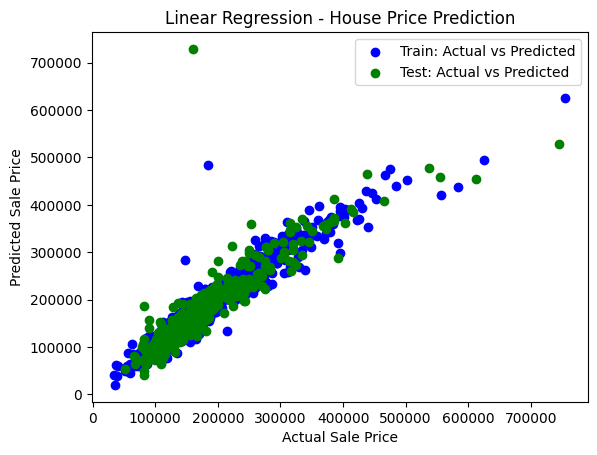

In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lin_reg = LinearRegression()
lin_reg.fit(x_train2, y_train2)
y_pred = lin_reg.predict(x_train2)
new_pred = lin_reg.predict(x_test2)

print("Intercept (β₀):", lin_reg.intercept_)
print("Coefficients (βᵢ for each feature):")
for feature, coef in zip(x_train2.columns, lin_reg.coef_):
    print(f"  {feature}: {coef:.4f} (meaning y changes by {coef:.4f} units per unit increase in {feature})")

mae=mean_absolute_error(y_train2,y_pred)
mse=mean_squared_error(y_train2,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_train2,y_pred)
n=len(y_train2)
k = x_train2.shape[1]
adjusted_r2 = 1- ((1-r2)*(n-1)/(n-k-1))

print('MAE:',mae)
print('MSE:',mse)
print('RMSE:',rmse)
print('R2:',r2)
print('Adjusted R2:',adjusted_r2)

comparison_df = pd.DataFrame({
    "Actual_Train": y_train2.values,
    "Predicted_Train": y_pred
})

print("Training Data (Actual vs Predicted):")
print(comparison_df.head(10))

# For Test Set
comparison_test_df = pd.DataFrame({
    "Actual_Test": y_test2.values,
    "Predicted_Test": new_pred
})

print("Test Data (Actual vs Predicted):")
print(comparison_test_df.head(10))

plt.scatter(y_train2, y_pred, color='blue', label='Train: Actual vs Predicted')
plt.scatter(y_test2, new_pred, color='green', label='Test: Actual vs Predicted')
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Linear Regression - House Price Prediction")
plt.legend()
plt.show()